# Estimating Probability (Z%) of Stock Under-performing Market Index by X% over Y Days after Reaching Forward PE Ratio Threshold 

In [1]:
import numpy as np
from numpy import unravel_index
np.set_printoptions(threshold=np.nan)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math

###### UPDATE CSV FILE PATH NAME AND STOCK/INDEX/FEATURE NAMES

In [2]:
#csv file containing index price series, stock price series, 
#Forward PE ratio(or other stock feature) series
dataFile= '/Users/carolinesmallwood/Documents/Py Workspace/PCLNdata.csv'
stockTicker = 'PCLN'
indexTicker = 'SP'
feat = 'Forward PE'

###### SET INDICES OF FIRST AND LAST COLUMN OF PRICE/TIME SERIES

In [3]:
colStart = 9
colEnd = 1265


seriesLen = colEnd - colStart - 1
cols = range(colStart, colEnd)
x = range(0, seriesLen)
colName = map(str, x)

##### ADJUST PANDAS READ_CSV CALL AND/OR SERIES ORDERING, IF NEEDED

In [4]:
df = pd.read_csv(dataFile, header=None, usecols=cols, index_col=0)

#Reverse columns to restore chronological order
df = df[df.columns[::-1]]
df.columns = colName

idxPrice = df.iloc[0]
stockPrice = df.iloc[1]
feature = df.iloc[2]

### Visualizing the Data

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254
9,,,,,,,,,,,,,,,,,,,,,
LAST_PRICE,1382.200,1358.590,1368.710,1387.570,1370.260,1369.570,1390.780,1385.140,1376.920,1378.530,...,2344.020,2348.450,2345.960,2343.980,2341.590,2358.570,2361.130,2368.060,2362.720,2359.120
LAST_PRICE,764.750,741.260,729.570,742.150,735.180,702.000,715.370,732.220,717.180,710.170,...,1747.140,1751.990,1748.330,1753.110,1772.000,1788.450,1785.050,1789.200,1779.970,1781.800
BEST_PE_RATIO,23.516,22.794,22.395,22.781,22.567,21.107,21.509,22.016,21.563,21.353,...,23.681,23.747,23.697,23.762,24.018,24.241,24.195,24.251,24.172,23.748
BEST_CUR_EV_TO_EBITDA,17.439,16.873,16.555,16.857,16.690,15.794,16.114,16.517,16.157,15.990,...,16.733,16.783,16.745,16.795,16.991,17.162,17.127,17.170,17.074,16.887
BEST_CURRENT_EV_BEST_SALES,6.247,6.044,5.943,6.052,5.991,5.705,5.821,5.966,5.836,5.776,...,6.377,6.396,6.381,6.400,6.475,6.540,6.527,6.543,6.507,6.327
BEST_PX_BPS_RATIO,12.135,11.762,11.577,11.776,11.666,11.139,11.351,11.619,11.380,11.269,...,8.382,8.405,8.388,8.411,8.501,8.580,8.564,8.584,8.540,8.124


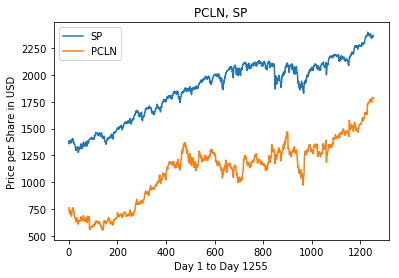

In [6]:
plt.plot(x, idxPrice, label=indexTicker)
plt.plot(x, stockPrice, label=stockTicker)
plt.legend()
plt.xlabel('Day 1 to Day ' + str(seriesLen))
plt.ylabel('Price per Share in USD')
plt.title(stockTicker + ', ' + indexTicker);

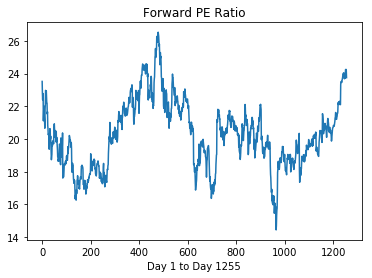

In [7]:
plt.plot(x, feature)
plt.xlabel('Day 1 to Day ' + str(seriesLen))
plt.title('Forward PE Ratio');

#### SET YMAX
#### Generate matrix of compound returns over y days from 1 to yMax

In [16]:
#Calculate compound return rate or both stock and index over y days
yMax = 14

#The [y, i] element of crStock tells us the daily compound return rate
#over days i to i+y+1 for the given stock (a span of y+1 days)
crStock = np.zeros((yMax, seriesLen))
crIdx = np.zeros((yMax, seriesLen))

for y in range(0, yMax):
    for i in range (0, seriesLen-y-1):
        crStock[y, i] = math.pow((stockPrice[i+y+1] / stockPrice[i]),(1/float(y+1))) - 1
        crIdx[y, i] = math.pow((idxPrice[i+y+1] / idxPrice[i]), (1/float(y+1))) - 1
        
maxUnderperf = np.max(crIdx - crStock)

stock_v_idx = crStock - crIdx

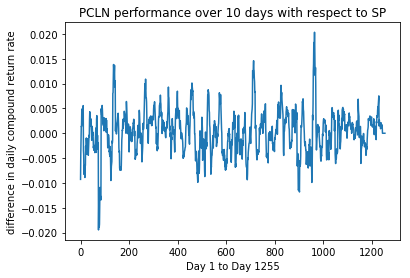

In [122]:
y = 10
plt.plot(x, stock_v_idx[plotY])
plt.xlabel('Day 1 to Day ' + str(seriesLen))
plt.ylabel('difference in daily compound return rate')
plt.title(stockTicker + ' performance over ' + str(y) + ' days with respect to ' + indexTicker);

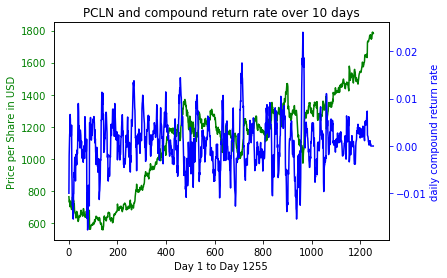

In [123]:
y = 10

fig, ax1 = plt.subplots()
ax1.plot(x, stockPrice,'g', label=stockTicker)
ax1.set_xlabel('Day 1 to Day ' + str(seriesLen))
ax1.set_ylabel('Price per Share in USD', color='g')
ax1.tick_params('y', colors='g')

plt.title(stockTicker + ' and compound return rate over ' + str(y) + ' days')

ax2 = ax1.twinx()
ax2.plot(x, crStock[y, :], 'b-', label='compound return rate')
ax2.set_ylabel('daily compound return rate', color='b')
ax2.tick_params('y', colors='b');

### Calculate Probability Matrix, Z

#### EDIT featureSteps, pDiffSteps, and minPdiff VARIABLES, IF DESIRED
Reducing number of steps will reduce computation time

minPdiff should be set to minimum lucrative underperformance rate of stock with respect to market

In [119]:
#Number of feature thresholds
featureSteps = 50

#Number of percent change differences between index and stock
#i.e. underperformance steps
pDiffSteps = 50

#Construct range of feature thresholds
minF = min(feature)
maxF = max(feature)
stepF = (maxF - minF) / featureSteps
featureRange = np.arange(minF, maxF, stepF)

#Construct range of percent change difference between index and stock
#minPdiff = min(idx_v_stock) + 0.10
minPdiff = 0.001
maxPdiff = maxUnderperf
stepPdiff = (maxPdiff - minPdiff) / pDiffSteps
pDiffRange = np.arange(minPdiff, maxPdiff, stepPdiff)

In [120]:
feat_v_thresh = np.zeros((featureSteps, seriesLen))

i = 0
for f in featureRange:
    feat_v_thresh[i] = feature - f
    i += 1

#### Z[x, f, y] = likelihood that  surpassing feature value stored at f in featureArray will lead to x% or greater market underperformance over y days: 

##### In order to track feature falling below threshold, swap 0 and 1 assignments to fvt vector (feature vs threshold) Then overThreshCt will actually hold number of days in which feature falls below threshold

In [26]:
fvt = np.copy(feat_v_thresh)
#To test predictive power of feature falling BELOW threshold, swap 0 and 1 on the next two lines
fvt[fvt < 0] = 0
fvt[fvt > 0] = 1

#Number of days feature exceeds feature threshold
overThreshCt = np.sum(fvt, axis=1)

In [124]:
Z = np.zeros((pDiffSteps, featureSteps, yMax))

d = 0
for diff in pDiffRange:
    #Find boolean of days that stock underperforms idx by diff (over the next y days)
    for y in range(0, yMax):
        underperf = np.copy(stock_v_idx[y, :])
        underperf[underperf > -diff] = 0
        underperf[underperf < -diff] = 1
        for featIdx in range(0, featureSteps):
            underperf_threshEx = np.logical_and(underperf, fvt[featIdx])
            Z[d, featIdx, y] = sum(underperf_threshEx) / overThreshCt[featIdx]
    d += 1
            

In [73]:
#(X,featIdx, Y) tuple generating the max probability in Z
maxIdx = unravel_index(Z.argmax(), Z.shape)
maxIdx

(0, 46, 6)

##### max probability occurs unsurprisingly for the smallest rate of underperformance, 0.001 or 0.1%, with a relatively high forwardPE ratio threshold (47th out of 50) and a span of y=6 days
##### The probability at that point is 1.0

In [45]:
#Returns the index of the first element in vector that is >= key
#assumes vector is sorted
def findIndex(vector, key):
    for i in range(0, len(vector)):
        if (vector[i] >= key):
            return i
    return -1

In [46]:
def firstInstance(vector, value):
    for i in range(0, len(vector)):
        if vector[i] >= value:
            return i
    return -1

In [55]:
def lastInstance(vector, value):
    highest = -1
    for i in range(0, len(vector)):
        if vector[i] >= value:
            highest = i
    return highest
            

In [47]:
maxAtEachX = np.amax(Z, axis=0)

maxAtEachFeat = np.amax(Z, axis=1)

maxAtEachY = np.amax(Z, axis=2)

In [104]:
#Get first (smallest) pDiff such that z[pDiff, featIdx, y] >= zMin
featIdx = 46
y = 6
zMin = 0.5
pDiffidx = firstInstance(Z[:, featIdx, y], zMin)

In [105]:
#Get largest pDiff such that z[pDiff, featIdx, y] >= zMin
pDiffidxx = lastInstance(Z[:, featIdx, y], zMin)

#### Examine probabilities for a fixed compound return rate difference, which are indexed in increasing order, from 0 to 49

In [125]:
Z[0, :, :]

array([[ 0.45055821,  0.42743222,  0.40191388,  0.38437002,  0.38277512,
         0.37400319,  0.37320574,  0.3692185 ,  0.36602871,  0.36523126,
         0.35725678,  0.35087719,  0.34848485,  0.34290271],
       [ 0.45055821,  0.42743222,  0.40191388,  0.38437002,  0.38277512,
         0.37400319,  0.37320574,  0.3692185 ,  0.36602871,  0.36523126,
         0.35725678,  0.35087719,  0.34848485,  0.34290271],
       [ 0.4509178 ,  0.42777334,  0.40223464,  0.38467678,  0.38308061,
         0.37430168,  0.37350359,  0.36951317,  0.36632083,  0.36552275,
         0.3575419 ,  0.35115722,  0.34876297,  0.34317638],
       [ 0.45047923,  0.42731629,  0.40255591,  0.38498403,  0.38338658,
         0.37460064,  0.37380192,  0.36980831,  0.36661342,  0.3658147 ,
         0.35782748,  0.3514377 ,  0.34904153,  0.34345048],
       [ 0.45083933,  0.42765787,  0.4028777 ,  0.38529177,  0.38369305,
         0.37490008,  0.37410072,  0.37010392,  0.36690647,  0.36610711,
         0.35811351,  0.35

### To find the probability Z that the stock will underperform the market by at least targetX% over targetY days after exceeding the forward PE ratio targfeat:

###### SELECT TARGET VALUES FOR X (rate at which stock underperforms index, Y (length of underperformance in days, OR Z (probability of underperformance)

In [155]:
#targetX should be value in pDiffRange (0.001 to 0.17)
targetX = 0.001
targXidx = findIndex(pDiffRange, targetX)

#targetY should be <= maxY
targetY = 6

#For this problem, targFeat is the forward PE ratio threshold
#targFeat is in featureRange (14.44, 26.28)
targFeat = 25
targFeatidx = findIndex(featureRange, targFeat)

#probability in (0, 1)
probability = Z[targXidx, targFeatidx, targetY]
probability

0.77777777777777779

### To find the forward PE ratio which, when exceeded, predicts that stock will underperform index by at least targetX% over subsequent targetY days with likelihood >= targetZ:

In [158]:
targetZ = 0.50
subsetZ = Z[targXidx, :, targetY]

thresholdIdx = findIndex(subsetZ, targetZ)
if thresholdIdx < 0:
    print 'No feature step will generate this probability for the given X and Y parameters'
else:
    threshold = featureRange[thresholdIdx]
    print 'If the feature exceeds {} on day i, the stock will underperform the market by at least {}% over the next {} days with likelihood >= {}'.format(threshold, (targetX * 100), targetY, targetZ)

If the feature exceeds 22.41412 on day i, the stock will underperform the market by at least 0.1% over the next 6 days with likelihood >= 0.5


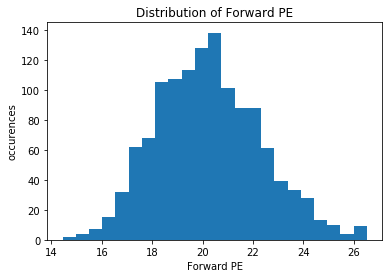

In [164]:
title = 'Distribution of ' + feat
plt.hist(feature, bins='auto')
plt.title(title)
plt.xlabel(feat)
plt.ylabel('occurences');